# STA 141A: Midquarter report 

Jiawei Zhu 923312684

## Overview

The midquarte report helps you start working on the wildfire dataset. The five tasks outline some basic exploratory data analysis to investigate the spatial and temporal patterns in the wildfire dataset. Each group is required to schedule and attend one consulting sessions  in Week 7. You can discussed and worked on the report with your groupmates, but you need to write up your own report. 

## Data

The full dataset ([link](https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires/data)) contains 1.88 million entries of wildfires. The dataset of is of 795 MB in size. You can find a smaller subset that contains 100,000 entries on Canvas. You can work on the small subset or the full dataset as you see fit. You can load the 100k data using the following code. Detailed description of variables in the dataset is available on Kaggle. 

In [9]:
wildfires <-read.csv("wildfires_sample_100k.csv")

---
###  Task 1 Understanding the Dataset



**(a)** Print the number of rows and columns, and list names and data types.


In [4]:
# Task 1(a): rows, columns, names, types
dim(wildfires)
names(wildfires)
str(wildfires)

[1] 100000     39

[1] "OBJECTID"                   "FOD_ID"                    
 [3] "FPA_ID"                     "SOURCE_SYSTEM_TYPE"        
 [5] "SOURCE_SYSTEM"              "NWCG_REPORTING_AGENCY"     
 [7] "NWCG_REPORTING_UNIT_ID"     "NWCG_REPORTING_UNIT_NAME"  
 [9] "SOURCE_REPORTING_UNIT"      "SOURCE_REPORTING_UNIT_NAME"
[11] "LOCAL_FIRE_REPORT_ID"       "LOCAL_INCIDENT_ID"         
[13] "FIRE_CODE"                  "FIRE_NAME"                 
[15] "ICS_209_INCIDENT_NUMBER"    "ICS_209_NAME"              
[17] "MTBS_ID"                    "MTBS_FIRE_NAME"            
[19] "COMPLEX_NAME"               "FIRE_YEAR"                 
[21] "DISCOVERY_DATE"             "DISCOVERY_DOY"             
[23] "DISCOVERY_TIME"             "STAT_CAUSE_CODE"           
[25] "STAT_CAUSE_DESCR"           "CONT_DATE"                 
[27] "CONT_DOY"                   "CONT_TIME"                 
[29] "FIRE_SIZE"                  "FIRE_SIZE_CLASS"           
[31] "LATITUDE"                   "LONGITUDE"                 
[33] "OWNER_CODE"                 "OWNER_DESCR"               
[35] "STATE"                      "COUNTY"                    
[37] "FIPS_CODE"                  "FIPS_NAME"                 
[39] "Shape"

'data.frame':	100000 obs. of  39 variables:
 $ OBJECTID                  : int  16 68 73 111 191 228 264 269 294 327 ...
 $ FOD_ID                    : int  16 68 74 112 194 231 268 274 299 333 ...
 $ FPA_ID                    : chr  "FS-1418876" "FS-1419017" "FS-1419045" "FS-1419134" ...
 $ SOURCE_SYSTEM_TYPE        : chr  "FED" "FED" "FED" "FED" ...
 $ SOURCE_SYSTEM             : chr  "FS-FIRESTAT" "FS-FIRESTAT" "FS-FIRESTAT" "FS-FIRESTAT" ...
 $ NWCG_REPORTING_AGENCY     : chr  "FS" "FS" "FS" "FS" ...
 $ NWCG_REPORTING_UNIT_ID    : chr  "USCAENF" "USMTKNF" "USMTKNF" "USCASNF" ...
 $ NWCG_REPORTING_UNIT_NAME  : chr  "Eldorado National Forest" "Kootenai National Forest" "Kootenai National Forest" "Sierra National Forest" ...
 $ SOURCE_REPORTING_UNIT     : chr  "0503" "0114" "0114" "0515" ...
 $ SOURCE_REPORTING_UNIT_NAME: chr  "Eldorado National Forest" "Kootenai National Forest" "Kootenai National Forest" "Sierra National Forest" ...
 $ LOCAL_FIRE_REPORT_ID      : chr  "103" "43" "33


**(b)** Identify variables with missing values and any other issues.


In [30]:
# Task 1(b): missing values per column
miss_value <- colSums(is.na(wildfires))

missing_percentage <- (miss_value / nrow(wildfires)) * 100


missing_summary <- data.frame(Column = names(wildfires), 
    MissingValues = miss_value, 
    MissingPercentage = round(missing_percentage, 2))

missing_summary <- missing_summary[order(missing_summary$MissingPercentage, decreasing = TRUE), ]
missing_summary <- missing_summary[missing_summary$MissingPercentage > 0, ]

missing_summary$MissingPercentage <- paste0(missing_summary$MissingPercentage, "%")

row.names(missing_summary) <- NULL

print(missing_summary) 

                    Column MissingValues MissingPercentage
1             COMPLEX_NAME         99751            99.75%
2                  MTBS_ID         99423            99.42%
3           MTBS_FIRE_NAME         99423            99.42%
4  ICS_209_INCIDENT_NUMBER         98634            98.63%
5             ICS_209_NAME         98634            98.63%
6                FIRE_CODE         82815            82.82%
7     LOCAL_FIRE_REPORT_ID         77654            77.65%
8                CONT_TIME         51813            51.81%
9                FIRE_NAME         51227            51.23%
10               CONT_DATE         47483            47.48%
11                CONT_DOY         47483            47.48%
12          DISCOVERY_TIME         46972            46.97%
13       LOCAL_INCIDENT_ID         43621            43.62%
14                  COUNTY         35991            35.99%
15               FIPS_CODE         35991            35.99%
16               FIPS_NAME         35991            35.9


**(c)** Write 4–6 sentences describing your initial impressions and data-quality concerns.


### The database is extremely large; it contains about 100k wildfire records, but the data can not be used because it has significant data quality problems. The first problem is that the "COMPLEX_NAME" and "MTBS_ID" have missing data in over 99%, so they can not be used. And also "DISCOVERY_TIME" only shows the value, not the formatted time, so the data needs to be formatted for the standard time format. As a result, the data requires cleaning and reformatting before it can be used reliably.

---
### Task 2 Exploring Temporal Patterns

Use `FIRE_YEAR`, `DISCOVERY_DOY`, and/or `DISCOVERY_DATE`.


**(a)** Convert `DISCOVERY_DATE` to a proper `Date` (Here we assume that the days are counted from 1970-01-01).

In [115]:
# Task 2(a): convert DISCOVERY_DATE to Date

wildfires <- read.csv("wildfires_sample_100k.csv")

wildfires %>% select(FIRE_YEAR, DISCOVERY_DOY) %>% head()

,FIRE_YEAR,DISCOVERY_DOY
,<int>,<int>
1,2004,277
2,2005,186
3,2005,182
4,2005,147
5,2005,202
6,2005,148


In [44]:
wildfires <- wildfires %>%
    mutate(DATE = as.Date(paste(FIRE_YEAR, DISCOVERY_DOY, sep = "-"), format = "%Y-%j"))

wildfires %>% 
    select(DATE, FIRE_YEAR, DISCOVERY_DOY) %>%
    head()

,DATE,FIRE_YEAR,DISCOVERY_DOY
,<date>,<int>,<int>
1,2004-10-03,2004,277
2,2005-07-05,2005,186
3,2005-07-01,2005,182
4,2005-05-27,2005,147
5,2005-07-21,2005,202
6,2005-05-28,2005,148


**(b)** Plot annual number of wildfires by year.


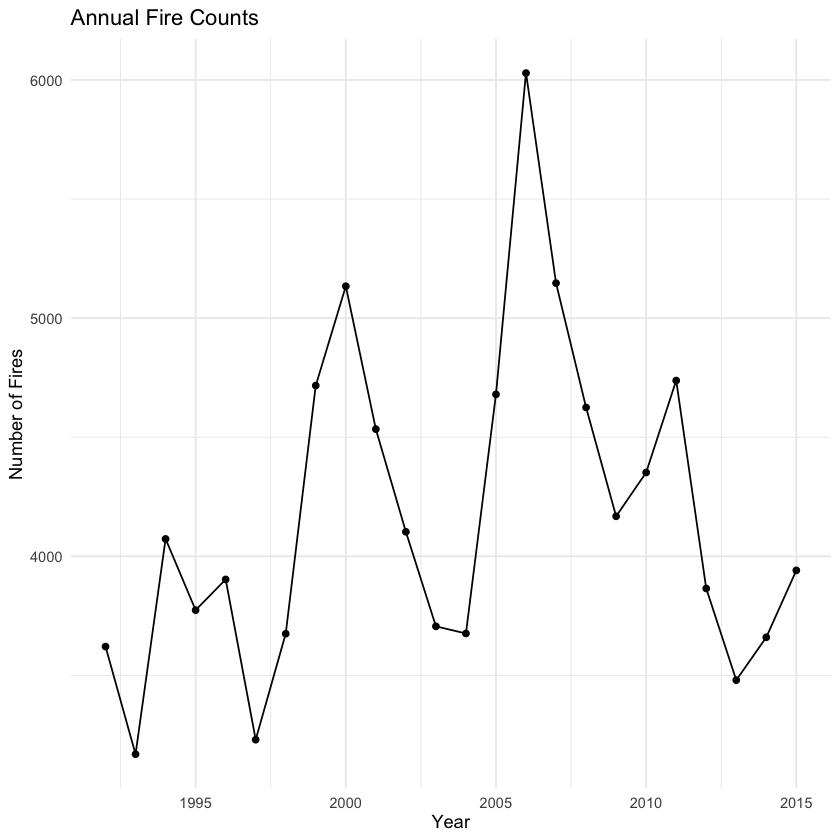

In [49]:
# Task 2(b): annual fire counts and plot

annual_fire_counts <- wildfires %>%
    group_by(FIRE_YEAR) %>%
    summarise(Count = n())

ggplot(annual_fire_counts, aes(x = FIRE_YEAR, y = Count)) +
    geom_line() +
    geom_point() +
    labs(title = "Annual Fire Counts", x = "Year", y = "Number of Fires") +
    theme_minimal()

**(c)** Plot average fire size per year by year. 

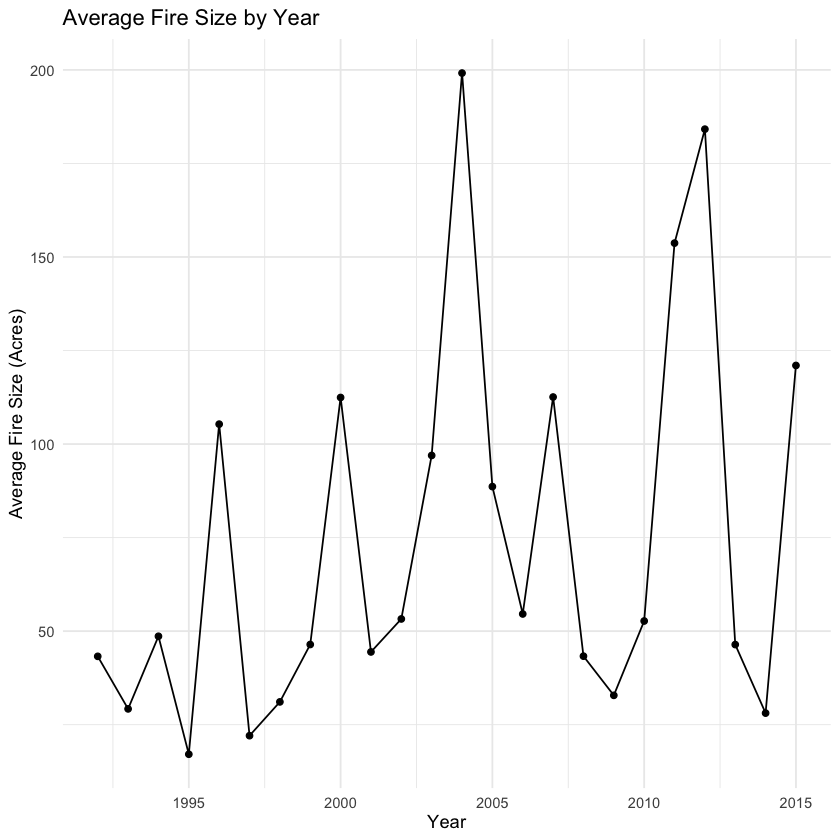

In [50]:
# Task 2(c): average fire size per year
acverage_fire_size <- wildfires %>%
    group_by(FIRE_YEAR) %>%
    summarise(average_size = mean(FIRE_SIZE, na.rm = TRUE))

ggplot(acverage_fire_size, aes(x = FIRE_YEAR, y = average_size)) +
    geom_line() +
    geom_point() +
    labs(title = "Average Fire Size by Year", x = "Year", y = "Average Fire Size (Acres)") +
    theme_minimal() 

**(d)** Write 3–5 sentences describing temporal trends.


### The temporal trend shows that there is a disconnect between fire frequency and fire severity. The annual wildfire range is about between 3000 (Year 1993) and 6100 (Year 2006). However, the average file size has large fluctuations. From 2001 to 2005, the average fire size became 50 to 200 acres. And from 2008 to 2012, the average fire size became about 30 to 180 acres. But, in 2006, the region with the highest number of fires had a relatively small average fire area. This indicates that larger severe fires are not always connected to high fire frequencies.

---
### Task 3 Exploring Spatial Patterns


**(a)** Create a table of fire counts per `STATE` and report the top 10 states.


In [60]:
# Task 3(a): counts per state
top_10_states <- wildfires %>%
    count(STATE,sort = TRUE) %>%
    head(10)
    
top_10_states

,STATE,n
,<chr>,<int>
1,CA,10089
2,GA,8899
3,TX,7545
4,NC,5815
5,FL,4814
6,NY,4353
7,SC,4320
8,MS,4246
9,AZ,3722


**(b)** Make a horizontal bar plot of the top 10 states.

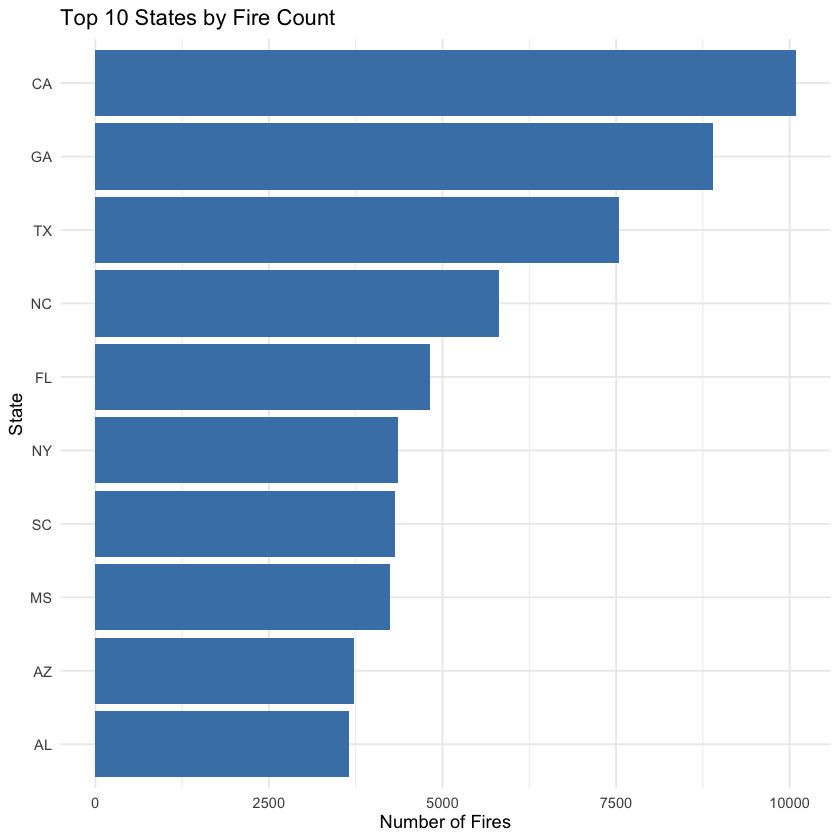

In [56]:
# Task 3(b): bar plot for top 10 states
ggplot(top_10_states, aes(x = reorder(STATE, Count), y = Count)) +
    geom_bar(stat = "identity", fill = "steelblue") +
    labs(title = "Top 10 States by Fire Count", x = "State", y = "Number of Fires") +
    theme_minimal() +
    coord_flip()

**(c)** Make a scatterplot of ignition points (`LONGITUDE` vs `LATITUDE`).


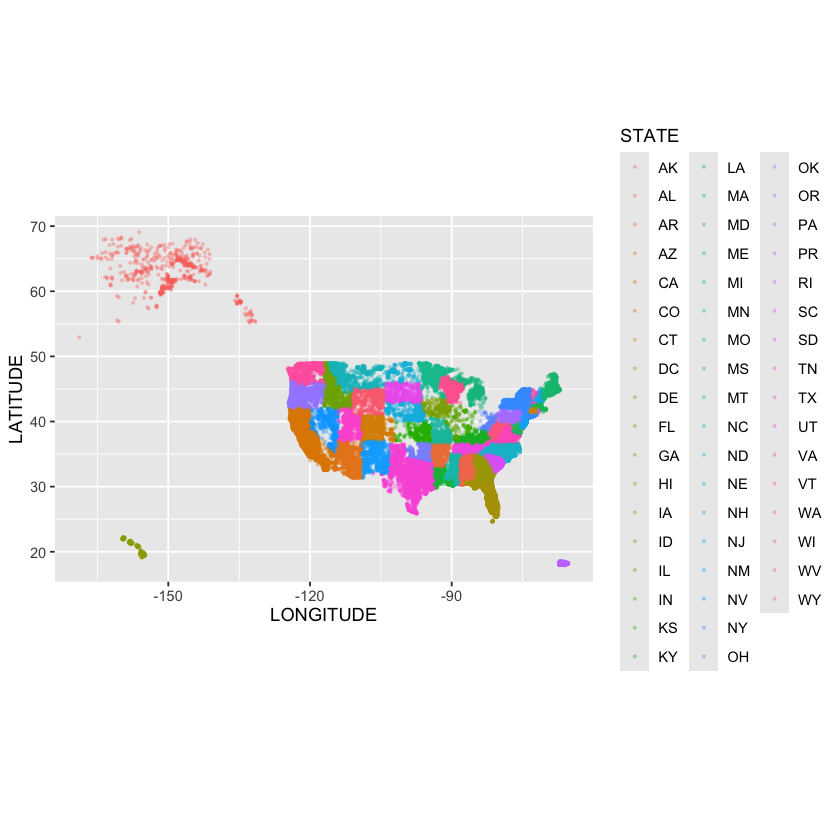

In [ ]:
# Task 3(c): ignition point scatterplot
ggplot(data = wildfires) + 
  geom_point(mapping = aes(x = LONGITUDE, y = LATITUDE, color = STATE), 
             alpha = 0.3, 
             size = 0.5) +
  coord_quickmap() 
 


**(d)** Comment briefly on geographic patterns. Optional: you may find it helpful to draw the boundaries of states. 

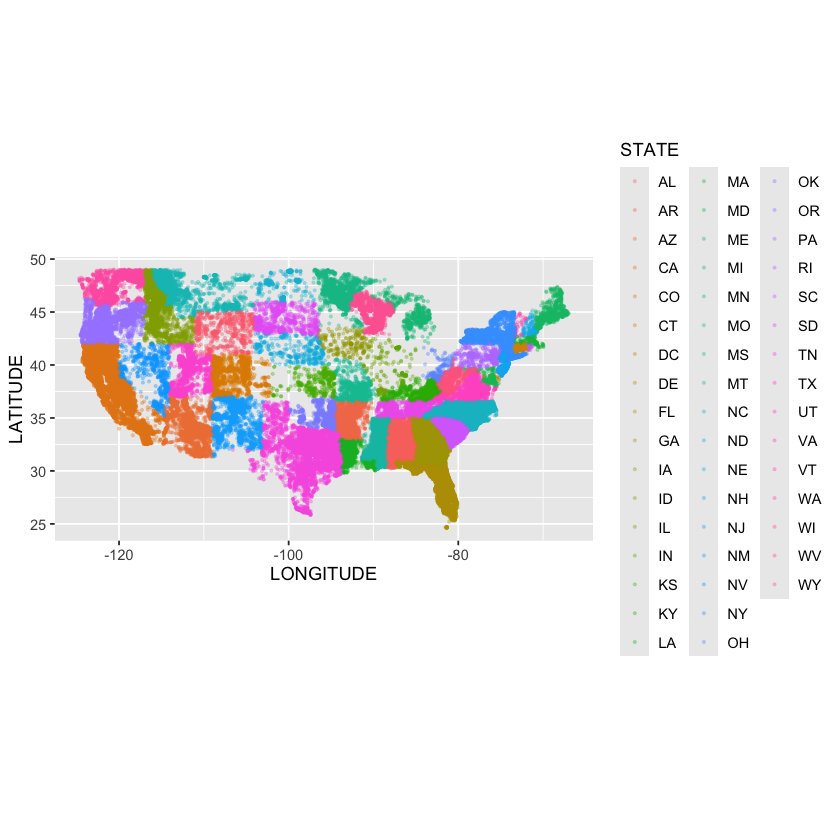

In [116]:
# Task 3(d): heatmap of median fire size by year and state
con_us <- wildfires %>%
    filter(!STATE %in% c("AK","HI","PR"))

con_plot <- ggplot(data = con_us) + 
  geom_point(mapping = aes(x = LONGITUDE, y = LATITUDE, color = STATE), 
             alpha = 0.3, 
             size = 0.5) +
  coord_quickmap()

con_plot

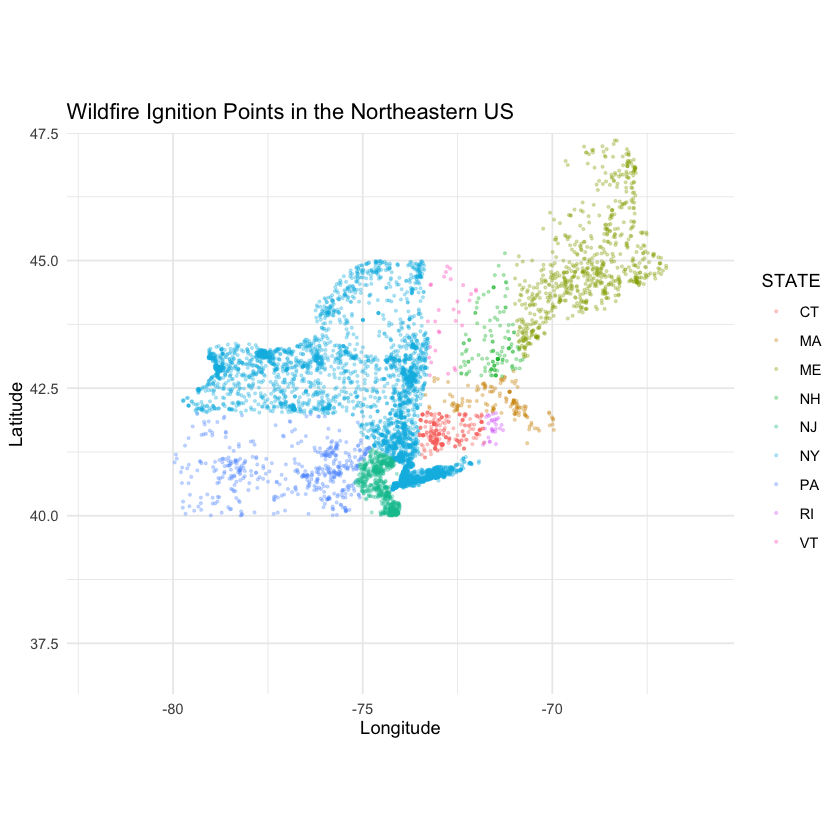

In [127]:
us_north_east <- ggplot(data = con_us %>% filter(LATITUDE > 40 & LONGITUDE > -80)) + 
  geom_point(mapping = aes(x = LONGITUDE, y = LATITUDE, color = STATE), 
             alpha = 0.3, 
             size = 0.5) +
  coord_quickmap(xlim = c(-82, -66), ylim = c(37, 47)) +
  labs(title = "Wildfire Ignition Points in the Northeastern US", x = "Longitude", y = "Latitude") +
  theme_minimal()

us_north_east

### The geographic pattern shows that wildfires do not ignite randomly; instead, they depend on the amount of rainfall in specific regions, such as California, Georgia, and Texas. In contrast, the Great Plains and Midwest regions show a significantly lower density of fires. However, rather than being completely because of geographic reasons, some of the sharp variances along national borders might also be the result of variations in reporting processes or policies.

---
### Task 4 Fire Size Distribution



**(a)** Plot a histogram of `FIRE_SIZE` in log scale.

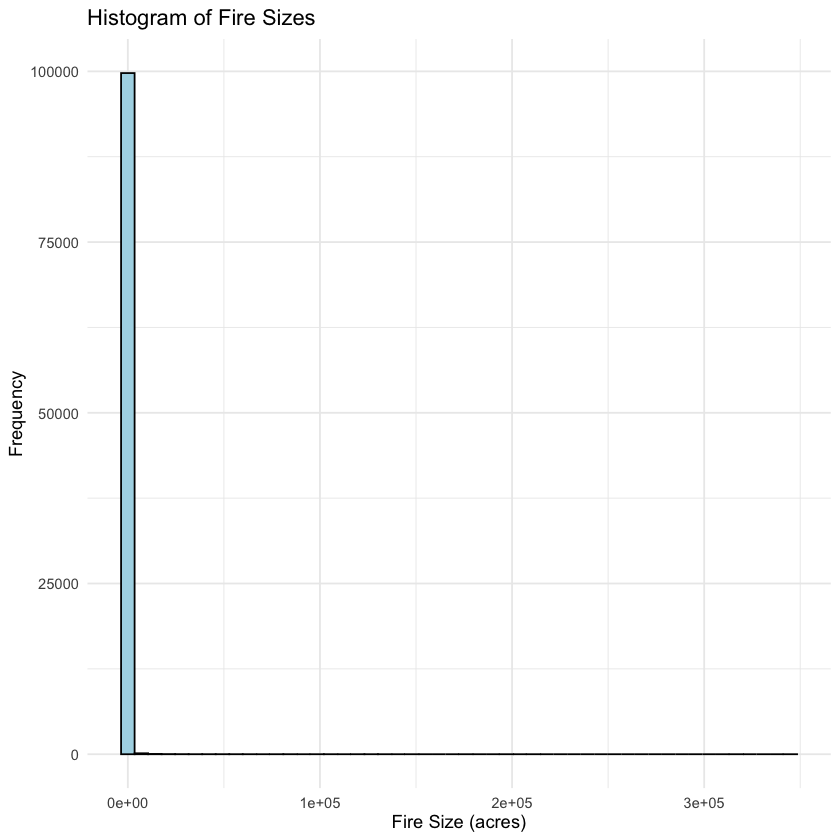

In [91]:
# Task 4(a): histogram(s) of FIRE_SIZE
# Histogram of fire size (raw scale)
ggplot(wildfires, aes(x = FIRE_SIZE)) +
  geom_histogram(bins = 50, fill = "lightblue", color = "black") +
  labs(title = "Histogram of Fire Sizes", x = "Fire Size (acres)", y = "Frequency") +
  theme_minimal()   

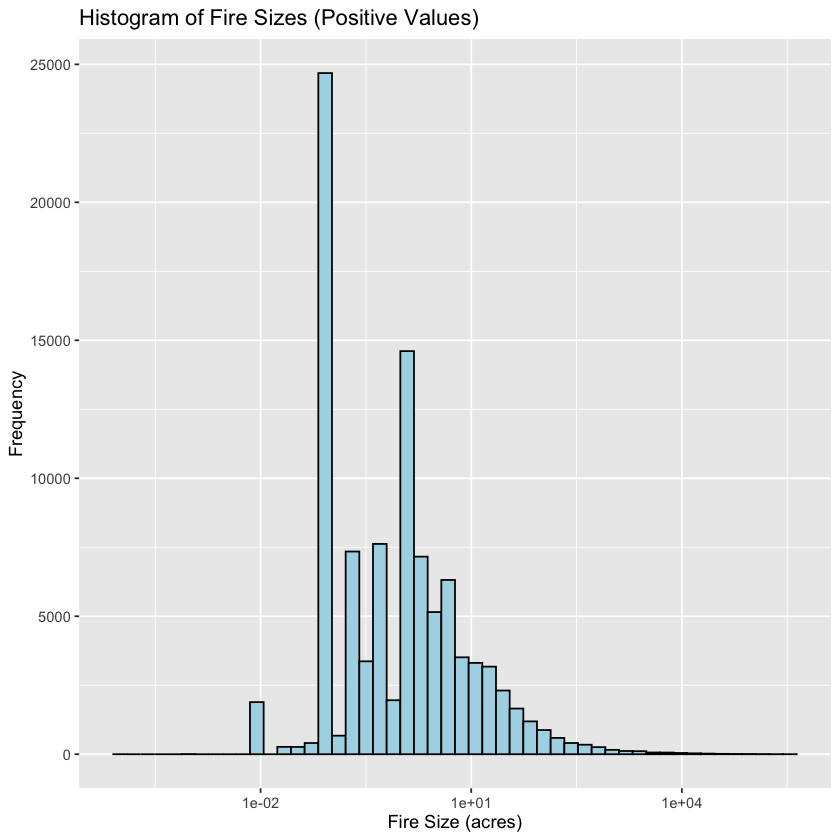

In [96]:
wildfires %>%
  filter(FIRE_SIZE > 0) %>%
  ggplot(aes(x = FIRE_SIZE)) +
    geom_histogram(bins = 50, fill = "lightblue", color = "black") +
    scale_x_log10() +
    labs(title = "Histogram of Fire Sizes (Positive Values)", x = "Fire Size (acres)", y = "Frequency") 


**(b)** Create a boxplot of `FIRE_SIZE` by `FIRE_SIZE_CLASS`.


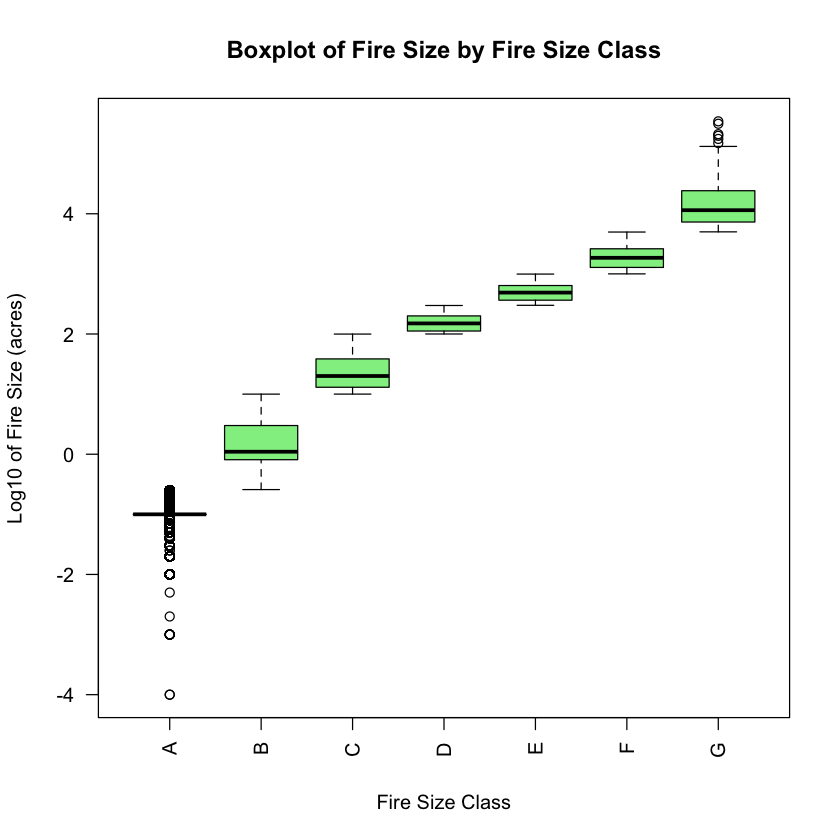

In [13]:
# Task 4(b): boxplot of FIRE_SIZE by FIRE_SIZE_CLASS
boxplot(log10(FIRE_SIZE) ~ FIRE_SIZE_CLASS, data = wildfires, main = "Boxplot of Fire Size by Fire Size Class", xlab = "Fire Size Class", ylab = "Log10 of Fire Size (acres)", col = "lightgreen", las = 2)

**(c)** Compute the median, 90th percentile, and 99th percentile of `FIRE_SIZE`.


In [14]:
# Task 4(c): summary statistics
median_fire_size <- median(wildfires$FIRE_SIZE, na.rm = TRUE)
cat("Median Fire Size:", median_fire_size, "\n")

percentile_fire_size_90 <- quantile(wildfires$FIRE_SIZE, probs = c(0.90), na.rm = TRUE)
cat("90th Percentile Fire Size:", percentile_fire_size_90, "\n")

percentile_fire_size_99 <- quantile(wildfires$FIRE_SIZE, probs = c(0.99), na.rm = TRUE)
cat("99th Percentile Fire Size:", percentile_fire_size_99, "\n")

Median Fire Size: 1 
90th Percentile Fire Size: 17 
99th Percentile Fire Size: 480 



**(d)** Write 3–4 sentences interpreting the distribution and what it suggests for prediction tasks.


### The distribution is strongly right-skewed and long-tailed, with the median fire area being just 1 acre and the 99th percentile being substantially different from 480 acres. Significant human reporting bias or rounding errors in the data are indicated by outlier peaks in the logarithmic histogram at particular values (0.1 acre and 1.0 acre). Because models trained on raw fire area data are unable to handle variance, logarithmic transformation is essential for normalizing the target variable in the prediction task. Furthermore, it would be more efficient to approach this task as a classification problem (predicting "fire area rating") rather than a pure regression problem given the challenges of predicting extreme outliers.

---

### Task 5 Visualizing Fire Size Patterns

**(a)** Create a visualization that illustrates both the spatial and temporal patterns of fire sizes across U.S. states and years. Specifically, construct a heatmap with `STATE` on the y-axis, `FIRE_YEAR` on the x-axis, and the median `FIRE_SIZE` within each state–year combination represented by color intensity. 

In [15]:
# Task 5(a) Heatmap
install.packages("viridis")
library(ggplot2)
library(dplyr)
library(viridis)


new_data <- wildfires %>%
  group_by(FIRE_YEAR, STATE) %>%
  summarise(
    median_size = median(FIRE_SIZE, na.rm = TRUE),
    mean_size   = mean(FIRE_SIZE, na.rm = TRUE), 
    n_fires     = n(),
    .groups     = "drop"
  )

  head(new_data)

Installing package into ‘/Users/apple/Library/R/x86_64/4.4/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/n6/2hjz3yvj2vg2r_pxlz4tjkfm0000gn/T//RtmpSfuPYg/downloaded_packages


FIRE_YEAR,STATE,median_size,mean_size,n_fires
<int>,<chr>,<dbl>,<dbl>,<int>
1992,AK,0.2,716.1111111,36
1992,AL,8.0,11.6250000,4
1992,AR,8.0,56.8500000,6
1992,AZ,0.2,16.0254144,181
1992,CA,0.2,18.2563406,552
1992,CO,0.1,0.9806452,62


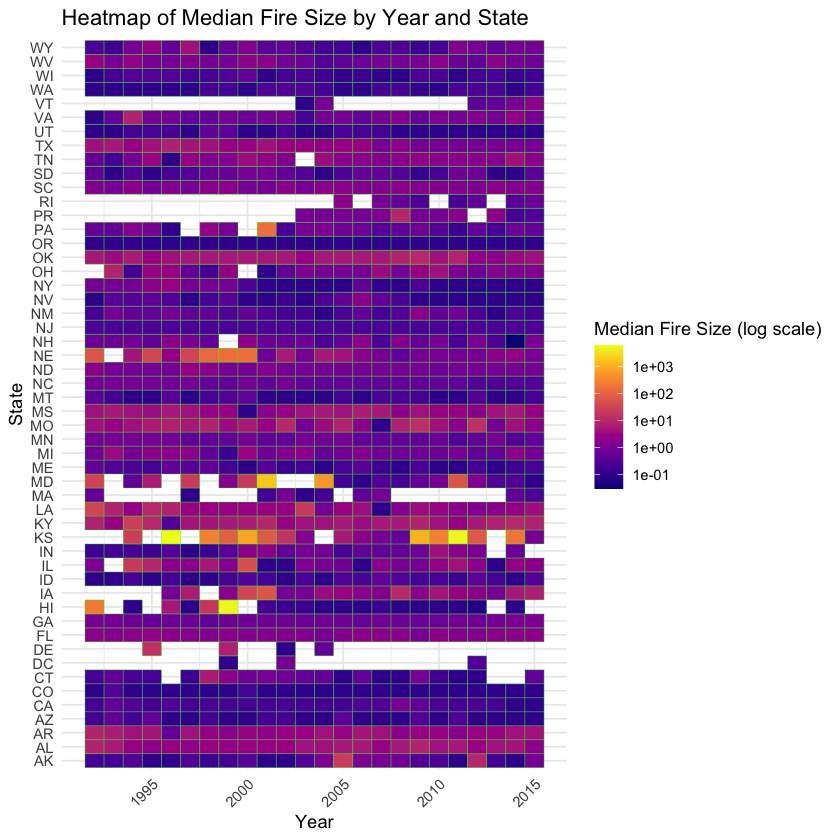

In [25]:
ggplot(new_data, aes(x = FIRE_YEAR, y = STATE, fill = median_size)) +
    geom_tile(color = "green", size = 0.1) +
    scale_fill_viridis(option = "plasma", direction = 1, trans = "log10", na.value = "grey50") +
        theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(title = "Heatmap of Median Fire Size by Year and State", x = "Year", y = "State", fill = "Median Fire Size (log scale)")


**(b)** Briefly interpret the visualization. Your interpretation should describe any noticeable spatial differences across states, temporal trends over years, or other meaningful patterns observed in the plot.

### A clear geometrical division is visible in this heatmap plot. The median wildfire sizes in the Midwest and the East (such as "KS", "NE", and "MD") are significantly larger than those in the West (such as "AZ", "CA", and "OR"). For all the time, most states have kept a small median fire size. During all the time in graph, some states like "KS" show an obvious rise from 2000 to 2015. This plot shows the median fire size by location. However, it highlights a statistical contrast: Western states, despite having overall wildfire danger, actually experience much lower median fire sizes, likely due to a high frequency of very small fires.

---
### Task 6  Designing Your Own Visualization

**(a)** Create an additional visualization of your own choosing that also highlights spatial and temporal information in fire sizes across states and years.  

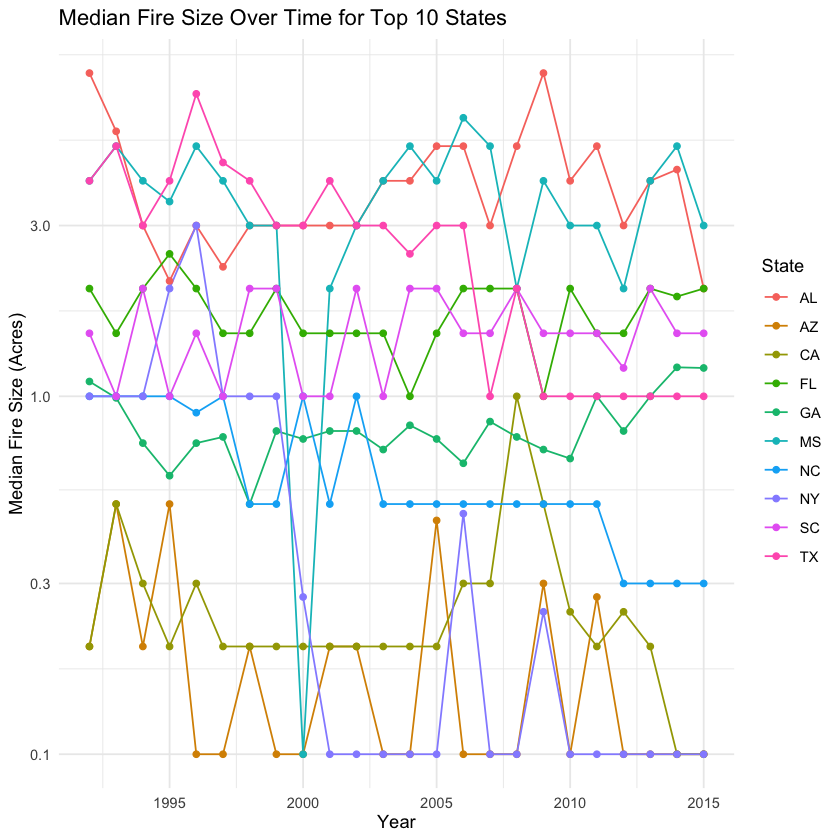

In [28]:
library(ggplot2)
library(dplyr)

top_states <- wildfires %>%
  count(STATE, sort = TRUE) %>%
  head(10) %>%
  pull(STATE)

linedata <- wildfires %>%
  filter(STATE %in% top_states) %>%
  group_by(FIRE_YEAR, STATE) %>%
  summarise(median_size = median(FIRE_SIZE, na.rm = TRUE), .groups = 'drop')

ggplot(linedata, aes(x = FIRE_YEAR, y = median_size, color = STATE)) +
  geom_line() +
  geom_point() +
  scale_y_log10() +
  labs(title = "Median Fire Size Over Time for Top 10 States", x = "Year", y = "Median Fire Size (Acres)", color = "State") +
  theme_minimal()

**(b)** Provide a short explanation of (1) why you chose this visualization, and (2) what new or complementary insights it reveals compared to plots from the other tasks.

### (1) The reason I choose line plot is that it is more visually for people to check the year-over-year change. Compared to the heatmap, I only filter the top 10 states by fire frequency to check directly at some specific times.

### (2) New insight 1: The line plot shows that states in different distinct groups: "AL" and "MS" keep a higher median baseline, while "NY" and "NC" keep a lower median baseline.

### New insight 2: The log scale shows the significant changes in relative importance (doubling in scale) between Western states like "CA" and "AZ" from year to year. It is easier to identify these extremely erratic variations in line graphs than it is to discern minute color shifts in heatmaps.
